<a href="https://colab.research.google.com/github/yashi4001/phishing-detector/blob/main/phishing_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashi4001","key":"031f435b938c5de421e07660a97aae76"}'}

In [11]:
!mkdir -p ~/.kaggle

In [12]:
!cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            563  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-24 07:15:53          10101  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1212  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1115  
iamsouravbanerjee/analytics-industry-salaries-2022-india    Data Profe

In [15]:
! kaggle datasets download taruntiwarihp/phishing-site-urls

 55% 5.00M/9.03M [00:00<00:00, 49.5MB/s]
100% 9.03M/9.03M [00:00<00:00, 57.8MB/s]


In [16]:
! unzip phishing-site-urls.zip

Archive:  phishing-site-urls.zip
  inflating: phishing_site_urls.csv  


In [56]:
import pandas as pd
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('phishing_site_urls.csv')
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [26]:
data.Label.value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [27]:
label_count = pd.DataFrame(data.Label.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


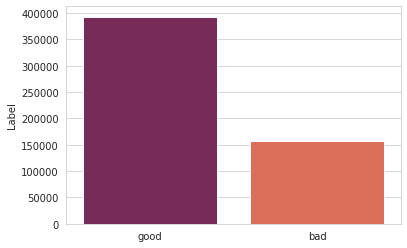

In [33]:
sns.set_style('whitegrid')
sns.barplot(label_count.index,label_count.Label,palette="rocket")

In [35]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [37]:
tokenizer.tokenize(data.URL[10])
tokenizer.tokenize(data.URL[20])

['www',
 'regaranch',
 'info',
 'grafika',
 'file',
 'atualizacao',
 'www',
 'itau',
 'com',
 'br']

In [40]:
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
data.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [42]:
stemmer = SnowballStemmer("english")
data['stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [43]:
data.head()

,URL,Label,text_tokenized,stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [46]:
data['join_stem'] = data['stemmed'].map(lambda l: ' '.join(l))
data.sample(5)

,URL,Label,text_tokenized,stemmed,join_stem
166777,ds.ign.com/objects/142/14257454.html,good,"[ds, ign, com, objects, html]","[ds, ign, com, object, html]",ds ign com object html
93905,webring.com/hub?ring=rmring,good,"[webring, com, hub, ring, rmring]","[webr, com, hub, ring, rmring]",webr com hub ring rmring
62622,www.c4i.org/erehwon/,good,"[www, c, i, org, erehwon]","[www, c, i, org, erehwon]",www c i org erehwon
447376,ticketsinventory.com/concert/men-without-hats-...,good,"[ticketsinventory, com, concert, men, without,...","[ticketsinventori, com, concert, men, without,...",ticketsinventori com concert men without hat t...
408,www.indesmoineslocalarea.com/~lmafamor/www.pay...,bad,"[www, indesmoineslocalarea, com, lmafamor, www...","[www, indesmoineslocalarea, com, lmafamor, www...",www indesmoineslocalarea com lmafamor www payp...


In [47]:
good_url=data[data.Label == 'good']
bad_url=data[data.Label == 'bad']

In [48]:
good_url.sample(5)

,URL,Label,text_tokenized,stemmed,join_stem
209485,lorraineogrady.com/miscegenated-family-album,good,"[lorraineogrady, com, miscegenated, family, al...","[lorraineogradi, com, miscegen, famili, album]",lorraineogradi com miscegen famili album
163405,davesgarden.com/community/forums/t/745742/,good,"[davesgarden, com, community, forums, t]","[davesgarden, com, communiti, forum, t]",davesgarden com communiti forum t
322738,epdfsearch.com/en/pdf/+Channel+9+KCMO-.html,good,"[epdfsearch, com, en, pdf, Channel, KCMO, html]","[epdfsearch, com, en, pdf, channel, kcmo, html]",epdfsearch com en pdf channel kcmo html
407269,nudography.com/Celebrities/melissa_galianos.aspx,good,"[nudography, com, Celebrities, melissa, galian...","[nudographi, com, celebr, melissa, galiano, aspx]",nudographi com celebr melissa galiano aspx
435681,spoke.com/info/p65ueoX/PhillipTalboy,good,"[spoke, com, info, p, ueoX, PhillipTalboy]","[spoke, com, info, p, ueox, philliptalboy]",spoke com info p ueox philliptalboy


In [49]:
bad_url.sample(5)

,URL,Label,text_tokenized,stemmed,join_stem
101150,living4u.80port.net/zb/doc/file.index.htm/rema...,bad,"[living, u, port, net, zb, doc, file, index, h...","[live, u, port, net, zb, doc, file, index, htm...",live u port net zb doc file index htm remax se...
111358,creativecakescolorado.com/images/pay/98cfd1d55...,bad,"[creativecakescolorado, com, images, pay, cfd,...","[creativecakescolorado, com, imag, pay, cfd, d...",creativecakescolorado com imag pay cfd d ecff ...
9051,pastehtml.com/view/bdw1f6g8x.html,bad,"[pastehtml, com, view, bdw, f, g, x, html]","[pastehtml, com, view, bdw, f, g, x, html]",pastehtml com view bdw f g x html
495915,laleven.com/ZjW5tf,bad,"[laleven, com, ZjW, tf]","[laleven, com, zjw, tf]",laleven com zjw tf
98255,103.234.36.75/rd927.exe,bad,"[rd, exe]","[rd, exe]",rd exe


In [52]:
cv = CountVectorizer()
tokens = cv.fit_transform(data.join_stem)
trainX, testX, trainY, testY = train_test_split(tokens, data.Label, test_size=0.2)

In [53]:
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9655046873577865

In [55]:
confusion_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

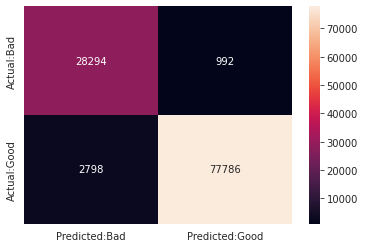

In [58]:
plt.figure(figsize= (6,4))
sns.heatmap(confusion_mat, annot = True,fmt='d')

In [67]:
url=['seaborn.pydata.org/examples/spreadsheet_heatmap.html','https://www.youtube.com/watch?v=J5bXOOmkopc&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=9']
url=cv.transform(url)
lr.predict(url)

array(['good', 'good'], dtype=object)